In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
train_path='/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train'
valid_path='/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/valid'

In [4]:
# train_path='./train/'
print(os.listdir(train_path))
print("*"*100)
# valid_path='./valid/'
print(os.listdir(valid_path))

['Tomato___Leaf_Mold', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight']
****************************************************************************************************
['Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Late_blight', 'Tomato___Target_Spot', 'Tomato___Leaf_Mold', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus']


In [5]:
folder=(os.listdir(train_path))
folder

['Tomato___Leaf_Mold',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight']

Represting the Tomatos

ty : being the type of disease

index : being the image in the data sets.

Text(0.5, 1.0, '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite')

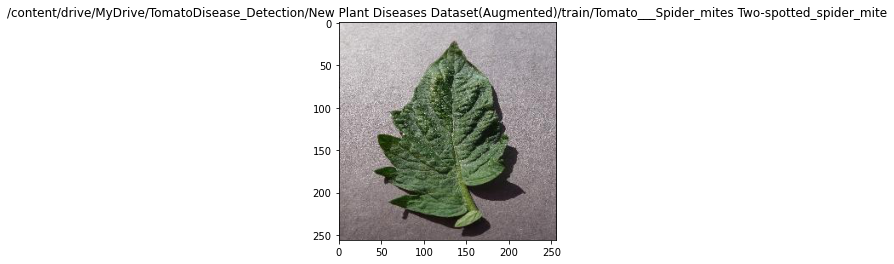

In [6]:
ty=2
index=25
import matplotlib.pyplot as plt
folder_name = 'Tomato___Spider_mites Two-spotted_spider_mite'
folder_path = os.path.join(train_path, folder_name)
img_path = os.path.join(folder_path, os.listdir(folder_path)[index])
image = plt.imread(img_path)
plt.imshow(image)
plt.title(folder_path)

In [7]:
from tensorflow.keras.layers import Lambda, Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [8]:
size=[128,128]
vgg19=VGG19(input_shape=size+[3],weights='imagenet',include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


Freezing the rest of the layers

In [9]:
for layer in vgg19.layers:
    layer.trainable=False

Creating the top layer for my desired prediction

In [10]:
x=Flatten()(vgg19.output)
prediction=Dense(len(folder),activation='softmax')(x)

model_vgg=Model(inputs=vgg19.input,outputs=prediction)

Model Summary

In [11]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

Compiling the code

In [12]:
plateau = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=7, 
            verbose=0,
            mode='min')

In [13]:
model_vgg.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Data Augmentation

In [14]:
train_datagen=ImageDataGenerator(validation_split=0.2,rescale=1./255,horizontal_flip=True,rotation_range=.2,shear_range=.2)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [15]:
TRAINING_DIR = '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/train' 
TESTING_DIR = '/content/drive/MyDrive/TomatoDisease_Detection/New Plant Diseases Dataset(Augmented)/valid'

In [16]:
train_set=train_datagen.flow_from_directory(TRAINING_DIR,
                                            target_size=(128,128),
                                            batch_size=16,
                                            class_mode='categorical',
                                            shuffle=True, 
                                            subset="training")

validation_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(128, 128),
        batch_size=16,
        class_mode='categorical',
        shuffle=True,
        subset="validation")


valid_set=valid_datagen.flow_from_directory(TESTING_DIR,
                                            target_size=(128,128),
                                            batch_size=16,
                                            class_mode='categorical',
                                            shuffle=False)

Found 13685 images belonging to 10 classes.
Found 3419 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [17]:
history=model_vgg.fit(train_set,
                validation_data=validation_generator,
                epochs=10)

Epoch 1/10
856/856 [==============================] - 3207s 4s/step - loss: 0.8126 - accuracy: 0.7264 - val_loss: 0.6129 - val_accuracy: 0.7885
Epoch 2/10
856/856 [==============================] - 127s 148ms/step - loss: 0.4877 - accuracy: 0.8338 - val_loss: 0.6972 - val_accuracy: 0.7631
Epoch 3/10
856/856 [==============================] - 125s 147ms/step - loss: 0.4060 - accuracy: 0.8632 - val_loss: 0.5945 - val_accuracy: 0.8020
Epoch 4/10
856/856 [==============================] - 126s 147ms/step - loss: 0.3597 - accuracy: 0.8785 - val_loss: 0.4823 - val_accuracy: 0.8374
Epoch 5/10
856/856 [==============================] - 125s 146ms/step - loss: 0.3032 - accuracy: 0.8962 - val_loss: 0.6018 - val_accuracy: 0.8116
Epoch 6/10
856/856 [==============================] - 124s 145ms/step - loss: 0.2914 - accuracy: 0.9000 - val_loss: 0.5760 - val_accuracy: 0.8119
Epoch 7/10
856/856 [==============================] - 126s 147ms/step - loss: 0.2438 - accuracy: 0.9168 - val_loss: 0.5134 - v

Visualizing the Fitting of the Model

Text(0.5, 1.0, 'Training and validation loss')

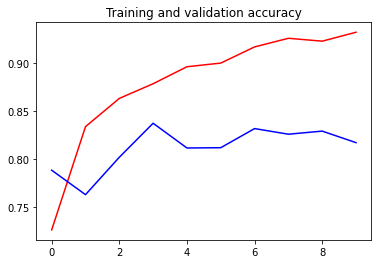

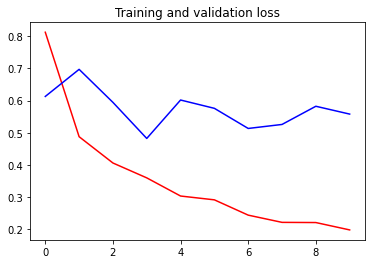

In [18]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', )
plt.plot(epochs, val_acc, 'b', )
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', )
plt.plot(epochs, val_loss, 'b', )


plt.title('Training and validation loss')

In [19]:
# Scores is just a list containing loss and accuracy value
scores=model_vgg.evaluate(train_set)
scores2=model_vgg.evaluate(valid_set)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Testing Loss is : "+str(scores2[0]))
print("Testing Accuracy is : "+str(scores2[1]*100)+" %")

287/287 [==============================] - 943s 3s/step - loss: 0.4808 - accuracy: 0.8384
Training Loss is :0.19305388629436493
Training Accuracy is :93.3065414428711 %
Testing Loss is : 0.4808109700679779
Testing Accuracy is : 83.8386058807373 %


Predicting the Model

In [20]:
y_pred=model_vgg.predict(valid_set)

287/287 [==============================] - 17s 60ms/step


Saving the model

In [21]:
model_vgg.save('model_vgg19.h5')

Checking the prediction of the model

In [22]:
import cv2
def prepare(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_COLOR)
    img_array=img_array/255
    new_array=cv2.resize(img_array,(128,128))
    return new_array.reshape(-1,128,128,3)

In [23]:
class_dict=train_set.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [24]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction)==clss:
            return key

Tomato___Late_blight
1/1 [==============================] - 1s 893ms/step


'Tomato___Early_blight'

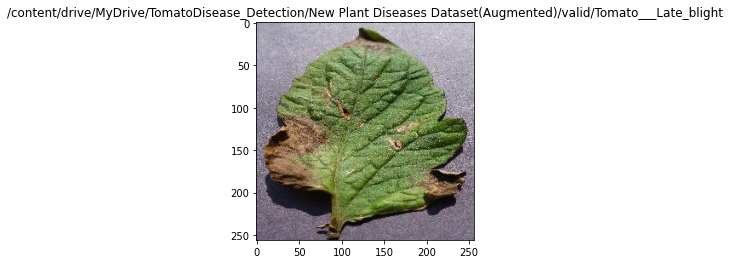

In [31]:
import matplotlib.pyplot as plt
ty = 9
index = 6
folder_name = 'Tomato___Late_blight'
folder_path = os.path.join(valid_path, folder_name)
img_path = os.path.join(folder_path, os.listdir(folder_path)[index])
image = plt.imread(img_path)
print(folder[ty])
plt.imshow(image)
plt.title(folder_path)
pred=model_vgg.predict([prepare(img_path)])
prediction_cls(pred)